# Introduction to Neural Networks

This project is done by Mohammed Ali El Adlouni and is part of the Deep Learning course in the Master's program MALIA at Université Lyon 2.

In this project, the goal is to write the entire backpropagation algorithm from scratch using only Numerical Python package (numpy) and implement a simple multilayer perceptron (MLP). This will involve developing the necessary components for forward propagation, loss computation, and backpropagation to update the network's weights and biases effectively. We will also study the effect of some hyperparameters (learning rate, choice of activation function, etc) on the performance score and the elapsed time.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from model import *
from utils import *

## Class Definition

### `class NeuralNetwork`
The `NeuralNetwork` class implements a feedforward neural network. It allows for :

- Customizable architecture (number layers, number neurons, number of outputs, etc)
- Activation functions : sigmoid, hyperbolic tangent, ReLU and leaky ReLU 
- Learning rates, number of epochs, loss treshold, etc.

#### `__init__(self, nb_neurons_per_layer, activation_fct, learning_rate, loss_treshold, max_iteration)`
- **Purpose**: Initializes the neural network parameters and creates numpy arrays to stock pre-activations, activations, gradients, etc

- **Parameters**:
  - `nb_neurons_per_layer`: A list containing the number of neurons in each layer.
  - `activation_fct`: The activation function to use (e.g., 'sigmoid', 'relu', etc.).
  - `learning_rate`: The rate at which the model learns.
  - `loss_treshold`: The threshold for loss to stop training.
  - `max_iteration`: The maximum number of iterations for training.
  
- **Functionality**:
  - Sets the random seed for reproducibility.
  - Sets weights and biases initialisation. Proper initialization of weights is essential for neural network training because it sets the starting point for the optimization process, which significantly impacts convergence speed and the likelihood of reaching a good solution. Poor initialization can cause:
  
- **Vanishing gradients**: When weights are too small, gradients can become too small to influence weight updates, stalling learning.
- **Exploding gradients**: When weights are too large, gradients can grow excessively, leading to unstable updates and divergence.

In this code, two popular initialization methods are used based on the activation function:

1. **Xavier Initialization** (used for **Sigmoid** and **Tanh** activation functions):
   - **Formula**: For weights in a layer with `input_size` neurons feeding into `output_size` neurons, Xavier initialization sets the weights by sampling from a uniform distribution:
     $$
     W \sim \text{Uniform}\left(-\sqrt{\frac{6}{\text{input\_size} + \text{output\_size}}}, \sqrt{\frac{6}{\text{input\_size} + \text{output\_size}}}\right)
     $$
   - **Purpose**: This method keeps the variance of activations and gradients roughly the same across layers, which helps avoid the vanishing/exploding gradient problem in networks with Sigmoid and Tanh activations.

2. **He Initialization** (used for **ReLU** and **Leaky ReLU** activation functions):
   - **Formula**: For a layer with `input_size` neurons feeding into `output_size` neurons, He initialization samples weights from a normal distribution:
     $$
     W \sim \mathcal{N}\left(0, \sqrt{\frac{2}{\text{input\_size}}}\right)
     $$
   - **Purpose**: He initialization is optimized for ReLU-type activations, which are more sensitive to the magnitude of weights. By scaling the weights according to the number of input neurons, this method helps maintain stable gradients during training, which is crucial for efficient learning with ReLU and Leaky ReLU functions.

---

### `linear(self, i, X_train)`
- **Purpose**: Computes the linear transformation for the `i`-th layer.
- **Parameters**:
  - `i`: The index of the layer for which to compute the linear transformation.
  - `X_train`: The input data.
- **Functionality**: Calculates the pre-activation values (`z`) for the specified layer, taking into account the input from the previous layer.

In a neural network, the linear transformation for a layer can be represented by the equation:

$$
z^{(i)} = W^{(i)} \cdot a^{(i-1)} + b^{(i)}
$$

where:

$$
\begin{align*}
& z^{(i)} \text{ is the pre-activation value for the } i \text{-th layer,} \\
& W^{(i)} \text{ is the weight matrix connecting the } (i-1) \text{-th layer to the } i \text{-th layer,} \\
& a^{(i-1)} \text{ is the activation from the previous layer (or the input data } X_{\text{train}} \text{ if } i = 0), \\
& b^{(i)} \text{ is the bias vector for the } i \text{-th layer.}
\end{align*}
$$


This linear transformation prepares the data for the subsequent activation function applied in each layer, which adds non-linearity and enables the network to model complex patterns.

---

### `activation_function(self, i)`
- **Purpose**: Applies the activation function to the pre-activation values for the `i`-th layer.
- **Parameters**:
  - `i`: The index of the layer to apply the activation function to.
- **Functionality**: Transforms the linear output (`z`) using the chosen activation function (sigmoid, ReLU, tanh, or leaky ReLU) and stores the result in the `activations` array.

#### Equations:
- **Sigmoid Activation**:
  $$ a^{(i)} = \sigma(z^{(i)}) = \frac{1}{1 + e^{-z^{(i)}}} $$
  
- **ReLU Activation**:
  $$ a^{(i)} = \text{ReLU}(z^{(i)}) = \max(0, z^{(i)}) $$
  
- **Tanh Activation**:
  $$ a^{(i)} = \tanh(z^{(i)}) = \frac{e^{z^{(i)}} - e^{-z^{(i)}}}{e^{z^{(i)}} + e^{-z^{(i)}}} $$
  
- **Leaky ReLU Activation**:
  $$ a^{(i)} = \text{Leaky ReLU}(z^{(i)}) = \begin{cases} 
  z^{(i)} & \text{if } z^{(i)} > 0 \\ 
  0.01 z^{(i)} & \text{otherwise} 
  \end{cases} $$

---

### `forwardPropagation(self, X_train)`
- **Purpose**: Performs forward propagation through the network for a given input.
- **Parameters**:
  - `X_train`: The training input data.
- **Functionality**: Iteratively calls the `linear` and `activation_function` methods for each layer to compute the output of the network.

#### Equations:
- **Forward Propagation**:
  $$ a^{(i)} = \phi(z^{(i)}) \quad \text{for each layer } i $$
  where \( \phi \) is the activation function used in that layer.

---

### `compute_loss(self, y)`
- **Purpose**: Computes the loss between the predicted outputs and the true labels.
- **Parameters**:
  - `y`: The true output values.
- **Functionality**: Calculates the mean squared error loss and stores it for tracking the training progress.

#### Equations:
- **Mean Squared Error Loss**:
  $$ L = \frac{1}{n} \sum_{j=1}^{n} \frac{1}{2}(y_j - \hat{y}_j)^2 $$
  where \( \hat{y}_j \) is the predicted output and \( n \) is the number of observations.

---

### `backPropagation(self, X_train, y)`
- **Purpose**: Performs backpropagation to compute gradients for weights and biases.
- **Parameters**:
  - `X_train`: The training input data.
  - `y`: The true output values.
- **Functionality**: Computes the gradients with respect to the weights and biases by iterating backward through the network, updating the derivatives based on the chosen activation function.

#### Equations:
- **Gradient of Loss with respect to Activation**:
  $$ \delta^{(i)} = \nabla_a L \cdot \phi'(z^{(i)}) $$
  where \( \nabla_a L \) is the derivative of the loss with respect to the activations, and \( \phi' \) is the derivative of the activation function.

---

### `update_params(self)`
- **Purpose**: Updates the weights and biases using the computed gradients.
- **Functionality**: Applies the gradient descent update rule to adjust the weights and biases based on the learning rate.

#### Equations:
- **Weight Update Rule**:
  $$ W^{(i)} \leftarrow W^{(i)} - \eta \frac{\partial L}{\partial W^{(i)}} $$

- **Bias Update Rule**:
  $$ b^{(i)} \leftarrow b^{(i)} - \eta \frac{\partial L}{\partial b^{(i)}} $$
  where \( \eta \) is the learning rate.

---

### `train(self, X, y, return_loss='True')`
- **Purpose**: Trains the neural network using the provided training data.
- **Parameters**:
  - `X`: The input training data.
  - `y`: The target output values.
  - `return_loss`: Boolean to indicate whether to return the loss history.
- **Functionality**: Repeatedly performs forward propagation, loss computation, backpropagation, and parameter updates until the maximum iterations are reached or the loss falls below the specified threshold. Prints the loss every 100 epochs.

---

### `test(self, X, y, return_loss='True')`
- **Purpose**: Tests the neural network on the provided data and computes the test loss.
- **Parameters**:
  - `X`: The input testing data.
  - `y`: The target output values.
  - `return_loss`: Boolean to indicate whether to return the test loss.
- **Functionality**: Performs forward propagation and computes the test loss, storing the last computed loss for further analysis.



## Backpropagation code from scratch 

Epoch 0 : loss = 0.2564057827550298
train loss = 0.009956105225306294
test loss:  0.009728293645851701
y_pred = [[-1.25079894e-03  2.39237344e-01 -3.92224860e-05  8.56506877e-01]]


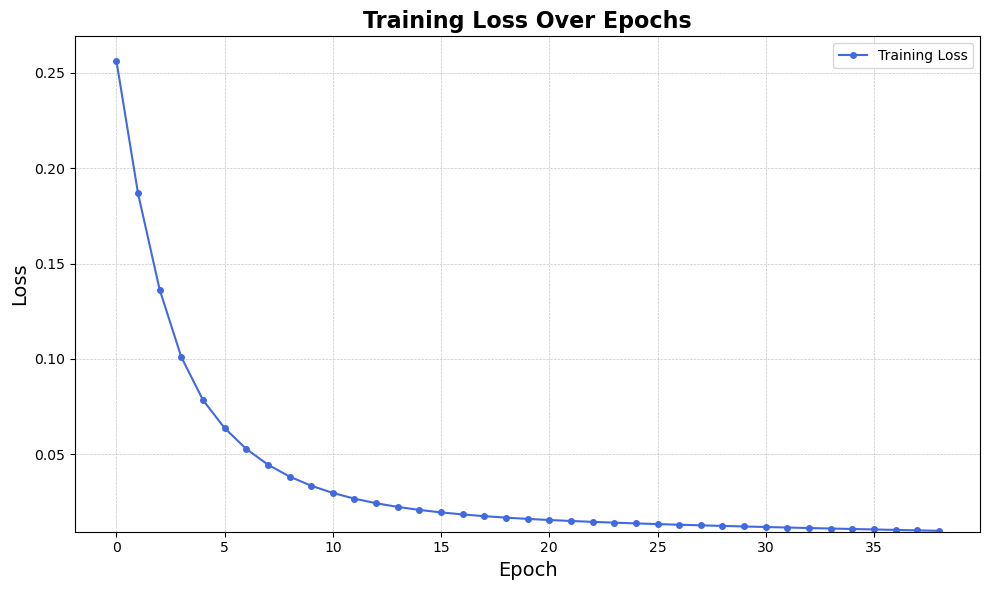

In [4]:
X_AND = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_AND = np.array([[0], [0], [0], [1]])

X_OR = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_OR = np.array([[0], [1], [1], [1]])

X_XOR = np.array([[0,0], [0,1], [1,0], [1,1]])
y_XOR = np.array([[0], [0], [0], [1]])

X = X_XOR
y = y_XOR

nn = NeuralNetwork([2, 3, 1], activation_fct='leaky_relu', learning_rate=0.01, loss_treshold=0.01, max_iteration=5000)

losses = nn.train(X, y, return_loss='True')
print(f'train loss = {losses[-1]}')

test_loss, y_pred = nn.test(X, y, return_loss='True')
print(f'test loss: ', test_loss)

print(f'y_pred =', y_pred)
plot_training_loss(losses)

Epoch 0 : loss = 0.12626040773841626
Epoch 100 : loss = 0.09771955485379956
Epoch 200 : loss = 0.08934314673250707


Epoch 300 : loss = 0.08486114153349439
Epoch 400 : loss = 0.08160899254819311
Epoch 500 : loss = 0.0789540664290985
Epoch 600 : loss = 0.07663170211581123
Epoch 700 : loss = 0.07449495013608837
Epoch 800 : loss = 0.07245951930853145
Epoch 900 : loss = 0.07047979073958319
Epoch 1000 : loss = 0.06853365542578725
Epoch 1100 : loss = 0.06661208894901013
Epoch 1200 : loss = 0.06471214041974176
Epoch 1300 : loss = 0.0628326380542273
Epoch 1400 : loss = 0.06097198552746804
Epoch 1500 : loss = 0.05912739273738296
Epoch 1600 : loss = 0.05729494435140225
Epoch 1700 : loss = 0.05547005807325846
Epoch 1800 : loss = 0.053648049924972165
Epoch 1900 : loss = 0.05182465407337615
Epoch 2000 : loss = 0.04999642720047652
Epoch 2100 : loss = 0.04816101259885192
Epoch 2200 : loss = 0.0463172628134168
Epoch 2300 : loss = 0.04446523368562298
Epoch 2400 : loss = 0.04260607319354586
Epoch 2500 : loss = 0.04074183716126935
Epoch 2600 : loss = 0.038875270185507675
Epoch 2700 : loss = 0.037009593132291664
Epoch 2

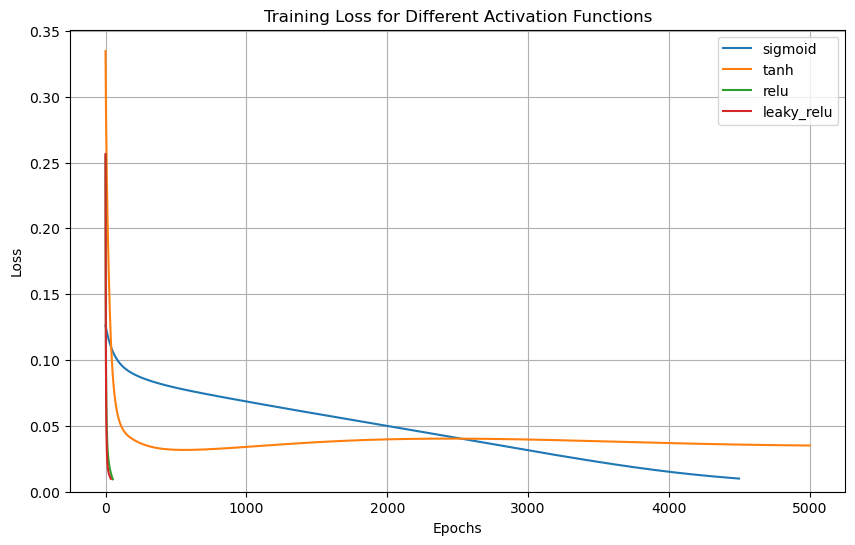

In [ ]:
activation_functions = ['sigmoid', 'tanh', 'relu', 'leaky_relu']
losses_dict = {}

for activation in activation_functions:
    # Initialize the neural network with the current activation function
    nn = NeuralNetwork([2, 3, 1], activation_fct=activation, learning_rate=0.01, loss_treshold=0.01, max_iteration=5000)

    # Train the network and store the losses
    losses = nn.train(X, y, return_loss='True')
    losses_dict[activation] = losses  # Store losses in a dictionary

    # Print train loss and test results
    print(f'Training with {activation} activation function:')
    print(f'Train loss = {losses[-1]}')
    test_loss, y_pred = nn.test(X, y, return_loss='True')
    print(f'Test loss: ', test_loss)
    print(f'y_pred =', y_pred)


# Use the function to plot the training losses
plot_training_loss(losses_dict)


In [6]:
# List of activation functions to test
activation_functions = ['sigmoid', 'tanh', 'relu', 'leaky_relu']

# Dictionary to store predictions for each activation function
predictions = {}

for activation in activation_functions:
    # Initialize the neural network
    nn = NeuralNetwork([2, 3, 1], activation_fct=activation, learning_rate=0.01, loss_treshold=0.01, max_iteration=5000)

    # Train the neural network
    losses = nn.train(X_XOR, y_XOR, return_loss='True')
    print(f'Train loss for {activation}: {losses[-1]}')

    # Test the neural network
    test_loss, y_pred = nn.test(X_XOR, y_XOR, return_loss='True')
    print(f'Test loss for {activation}: {test_loss}')

    # Store predictions in the dictionary
    predictions[activation] = y_pred.flatten()  # Flatten to 1D for easier printing

# Print predictions for each activation function
for activation, pred in predictions.items():
    print(f'y_pred for {activation}: {pred}')


Epoch 0 : loss = 0.12626040773841626
Epoch 100 : loss = 0.09771955485379956
Epoch 200 : loss = 0.08934314673250707
Epoch 300 : loss = 0.08486114153349439
Epoch 400 : loss = 0.08160899254819311
Epoch 500 : loss = 0.0789540664290985


Epoch 600 : loss = 0.07663170211581123
Epoch 700 : loss = 0.07449495013608837
Epoch 800 : loss = 0.07245951930853145
Epoch 900 : loss = 0.07047979073958319
Epoch 1000 : loss = 0.06853365542578725
Epoch 1100 : loss = 0.06661208894901013
Epoch 1200 : loss = 0.06471214041974176
Epoch 1300 : loss = 0.0628326380542273
Epoch 1400 : loss = 0.06097198552746804
Epoch 1500 : loss = 0.05912739273738296
Epoch 1600 : loss = 0.05729494435140225
Epoch 1700 : loss = 0.05547005807325846
Epoch 1800 : loss = 0.053648049924972165
Epoch 1900 : loss = 0.05182465407337615
Epoch 2000 : loss = 0.04999642720047652
Epoch 2100 : loss = 0.04816101259885192
Epoch 2200 : loss = 0.0463172628134168
Epoch 2300 : loss = 0.04446523368562298
Epoch 2400 : loss = 0.04260607319354586
Epoch 2500 : loss = 0.04074183716126935
Epoch 2600 : loss = 0.038875270185507675
Epoch 2700 : loss = 0.037009593132291664
Epoch 2800 : loss = 0.03514833793538744
Epoch 2900 : loss = 0.033295266054771976
Epoch 3000 : loss = 0.031454398039504394
E

In [7]:
print(predictions)

{'sigmoid': array([0.00697556, 0.11783024, 0.0764315 , 0.75473599]), 'tanh': array([-0.20314782,  0.23721746,  0.22279495,  0.63439697]), 'relu': array([0.        , 0.26133745, 0.        , 0.91461592]), 'leaky_relu': array([-1.25079894e-03,  2.39237344e-01, -3.92224860e-05,  8.56506877e-01])}


In [8]:
print("Shape of y:", y.shape)
print("Shape of y_pred:", y_pred.shape)


Shape of y: (4, 1)
Shape of y_pred: (1, 4)


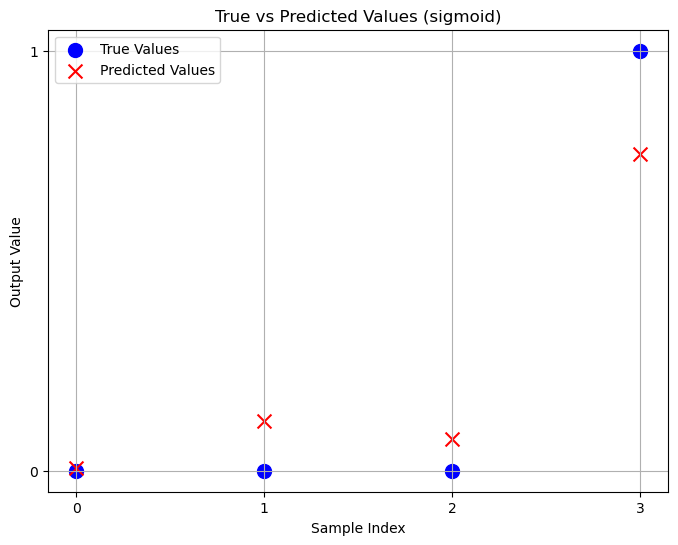

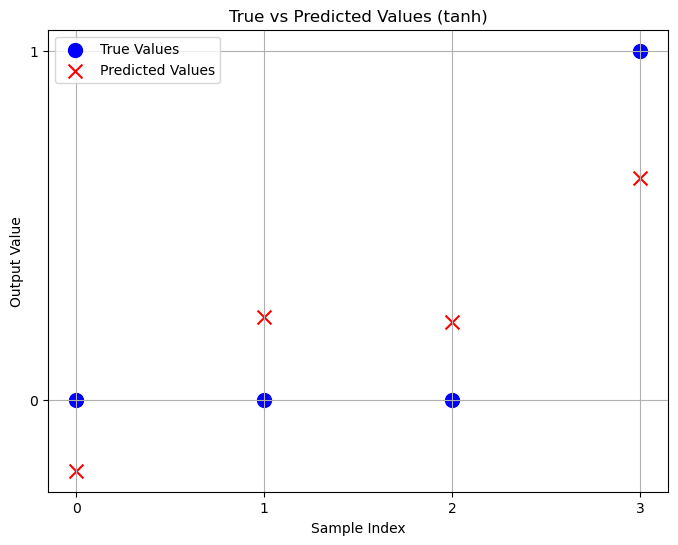

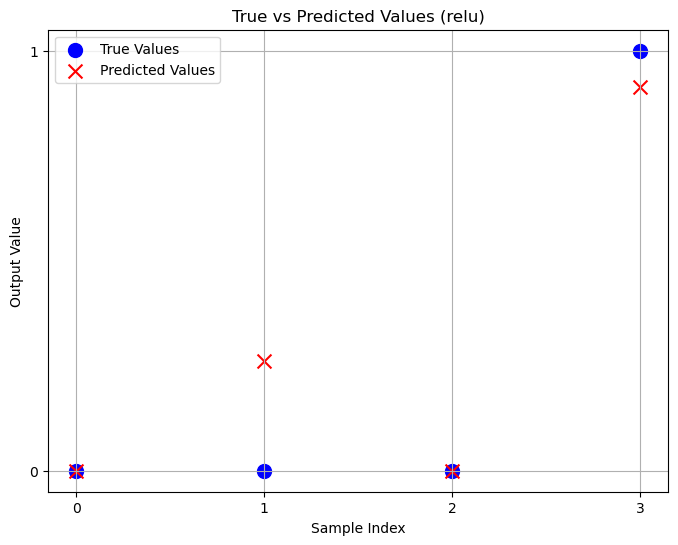

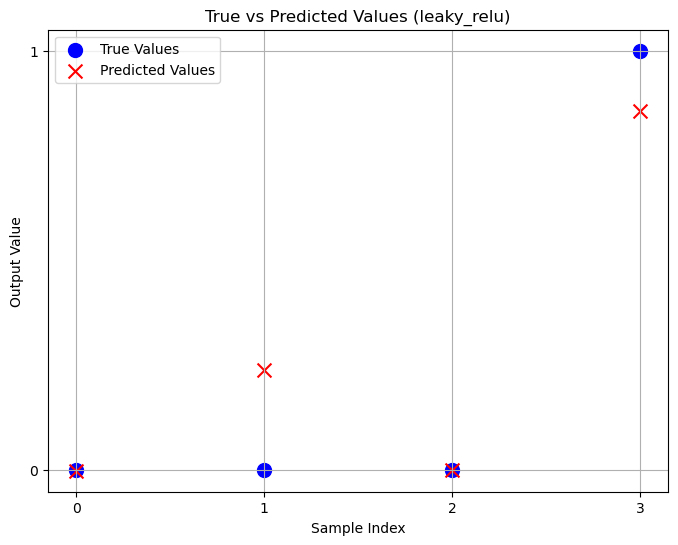

In [ ]:

for activation, y_pred in predictions.items():
    plot_predictions(y, y_pred.T, activation)


weights[1].T.shape: (10, 1)
dj_dz[1].shape: (1, 4)
z[1].shape: (1, 4)
dj_dz[0].shape before assignment: (10, 2)
self.z[0].shape : (10, 4)
self.z[1].shape : (1, 4)
(10, 4)
(10, 4)
Epoch 0 : loss = 0.07795014500439579
weights[1].T.shape: (10, 1)
dj_dz[1].shape: (1, 4)
z[1].shape: (1, 4)
dj_dz[0].shape before assignment: (10, 4)
self.z[0].shape : (10, 4)
self.z[1].shape : (1, 4)
(10, 4)
(10, 4)
weights[1].T.shape: (10, 1)
dj_dz[1].shape: (1, 4)
z[1].shape: (1, 4)
dj_dz[0].shape before assignment: (10, 4)
self.z[0].shape : (10, 4)
self.z[1].shape : (1, 4)
(10, 4)
(10, 4)
weights[1].T.shape: (10, 1)
dj_dz[1].shape: (1, 4)
z[1].shape: (1, 4)
dj_dz[0].shape before assignment: (10, 4)
self.z[0].shape : (10, 4)
self.z[1].shape : (1, 4)
(10, 4)
(10, 4)
weights[1].T.shape: (10, 1)
dj_dz[1].shape: (1, 4)
z[1].shape: (1, 4)
dj_dz[0].shape before assignment: (10, 4)
self.z[0].shape : (10, 4)
self.z[1].shape : (1, 4)
(10, 4)
(10, 4)
weights[1].T.shape: (10, 1)
dj_dz[1].shape: (1, 4)
z[1].shape: (1, 4

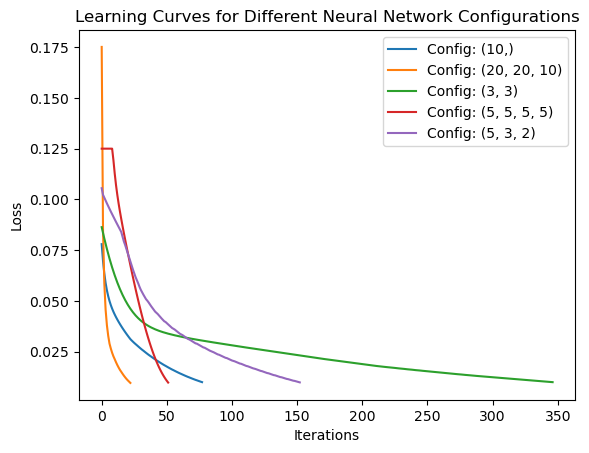

In [ ]:
# Define ranges for the number of neurons and hidden layers
hidden_layer_configs = [(10,), (20, 20, 10), (3, 3), (5, 5, 5, 5), (5, 3, 2)]  

# Dictionary to store losses for each configuration
losses_dict = {}

for config in hidden_layer_configs:
    # Initialize the neural network with the current configuration
    nn = NeuralNetwork([2] + list(config) + [1], activation_fct='relu', learning_rate=0.01, loss_treshold=0.01, max_iteration=5000)

    # Train the neural network
    losses = nn.train(X_XOR, y_XOR, return_loss='True')
    print(f'Train loss for configuration {config}: {losses[-1]}')

    # Store losses for plotting
    losses_dict[config] = losses

# Plot learning curves for each configuration
for config, losses in losses_dict.items():
    plt.plot(losses, label=f'Config: {config}')

plt.title('Learning Curves for Different Neural Network Configurations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
